In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [29]:
### Percentage Format Function###

from numbers import Number

def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    if isinstance(v, Number):
        return "{{:{}%}}".format(precision).format(v)
    else:
        raise TypeError("Numeric type required")

In [30]:
csv_path_city = "raw_data/city_data.csv"
csv_path_ride = "raw_data/ride_data.csv"
city_df = pd.read_csv(csv_path_city)
ride_df = pd.read_csv(csv_path_ride)
city_df.count()
# ride_df.head()

city            126
driver_count    126
type            126
dtype: int64

In [31]:
# Merge the two Dataframe
inner_merge_df = pd.merge(ride_df, city_df, on="city")

# Grouped the rider_df and city_df to do calculation
grouped_df = inner_merge_df.groupby(["city", "type", "driver_count"])

# Total Fare ($) Per City
fare_total = grouped_df["fare"].sum()

# Average Fare ($) Per City
fare_avg = grouped_df["fare"].mean()

# Total Number of Rides Per City
rides_total = grouped_df["ride_id"].count()

    #Put rider calc info into a dataframe
ride_by_city_df = pd.DataFrame({"Avg Fare": fare_avg,
                               "Total Rides": rides_total,
                               "Total Fare": fare_total})

ride_by_city_df = ride_by_city_df.reset_index()

# ride_by_city_df
# inner_merge_df.head()

Bubble Plot of Ride Sharing Data

In [32]:
# x_axis_urban = ride_by_city_df[ride_by_city_df['type'] == 'Urban']['Total Rides']
x_axis = ride_by_city_df["Total Rides"]

# Create a random array of data that we will use for our y values
# y_axis_urban = ride_by_city_df[ride_by_city_df['type'] == 'Urban']["Avg Fare"]
y_axis = ride_by_city_df["Avg Fare"]

# Size set to driver count
size = ride_by_city_df["driver_count"]

In [80]:
colors = {'Urban':'Gold', 'Suburban':'lightskyblue', 'Rural':'lightcoral'}

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis[ride_by_city_df['type'] == 'Urban'], y_axis[ride_by_city_df['type'] == 'Urban'], marker="o", c="lightcoral", s=size*2, alpha=0.75, label = "Urban")
plt.scatter(x_axis[ride_by_city_df['type'] == 'Suburban'], y_axis[ride_by_city_df['type'] == 'Suburban'], marker="o", c="lightblue", s=size*2, alpha=0.75, label = "Suburban")
plt.scatter(x_axis[ride_by_city_df['type'] == 'Rural'], y_axis[ride_by_city_df['type'] == 'Rural'], marker="o", c="gold", s=size*2, alpha=0.75, label = "Rural")

plt.title("Total Rides and Drivers per City by City Type")
plt.xlabel("Total Rides")
plt.ylabel("Fares")
plt.legend(title = "City Type")
plt.text(45, 35,"Note: \n Circle Size represents the drivers count per city", horizontalalignment='left')
plt.style.use('ggplot')

# The y limits of our scatter plot is 0 to 1
plt.ylim(15, 55)
# The x limits of our scatter plot is 0 to 100
plt.xlim(0, 40)

(0, 40)

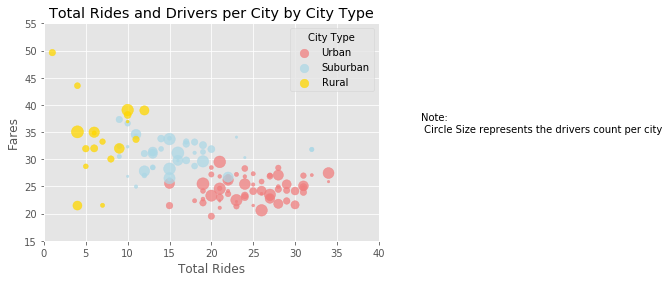

In [81]:
plt.show()

Urban has the most rides and compeitition compares to two other city types. Therefore, the average fare is the lower comparing to the other two city types.
Rural has the fewer rides available comparing to two other city types. Therefore, it has higher rides in average comparing to two other city types.

Pie Charts By City Type

In [35]:
# Group by City Type
grouped_type_df = inner_merge_df.groupby("type")

# Total Fares by City Type
fare_total_by_type = grouped_type_df["fare"].sum()

# Total Rides by City Type
rides_total_by_type = grouped_type_df["ride_id"].count()

# Total Drivers by City Type
drivers_total_by_type = grouped_type_df["driver_count"].sum()

# Create a Dataframe
ride_by_type_df = pd.DataFrame({"Total Fares": fare_total_by_type,
                            "Total Rides": rides_total_by_type,
                            "Total Drivers": drivers_total_by_type})

# % of Total Fares by City Type
ride_by_type_df["% of Total Fares"] = ride_by_type_df["Total Fares"] / ride_by_type_df["Total Fares"].sum()

# % of Total Rides by City Type
ride_by_type_df["% of Total Rides"] = ride_by_type_df["Total Rides"] / ride_by_type_df["Total Rides"].sum()

# % of Total Drivers by City Type
ride_by_type_df["% of Total Drivers"] = ride_by_type_df["Total Drivers"] / ride_by_type_df["Total Drivers"].sum()

# Reset the Index
ride_by_type_df = ride_by_type_df.reset_index()

# # % formatting
# ride_by_type_df["% of Total Drivers"] = ride_by_type_df["% of Total Drivers"].apply(as_percent)
# ride_by_type_df["% of Total Rides"] = ride_by_type_df["% of Total Rides"].apply(as_percent)
# ride_by_type_df["% of Total Fares"] = ride_by_type_df["% of Total Fares"].apply(as_percent)

ride_by_type_df



,type,Total Drivers,Total Fares,Total Rides,% of Total Fares,% of Total Rides,% of Total Drivers
0,Rural,727,4255.09,125,0.065798,0.051932,0.009699
1,Suburban,9730,20335.69,657,0.314458,0.272954,0.129806
2,Urban,64501,40078.34,1625,0.619745,0.675114,0.860495


In [36]:
type(ride_by_type_df['% of Total Fares'][2])

numpy.float64

In [37]:
# Labels for the sections of our pie chart
labels = ride_by_type_df["type"]

# The values of each section of the pie chart
fares = ride_by_type_df["% of Total Fares"]
rides = ride_by_type_df["% of Total Rides"]
drivers = ride_by_type_df["% of Total Drivers"]

# The colors of each section of the pie chart
colors = ["yellowgreen", "lightskyblue", "orange"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

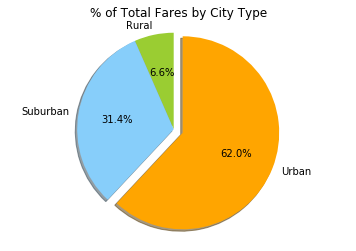

In [38]:
plt.title("% of Total Fares by City Type")
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
       shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [ ]:
Observation: Urban has the most expensive fare. Rural has the least expensive fare.

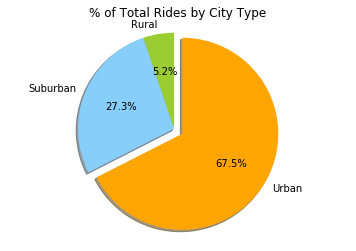

In [39]:
plt.title("% of Total Rides by City Type")
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
       shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [ ]:
Urban has the most rides. Rural has the least rides.

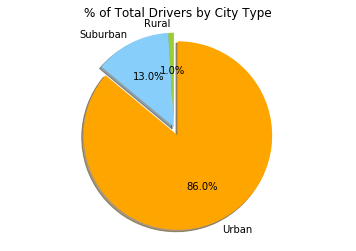

In [40]:
plt.title("% of Total Drivers by City Type")
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
       shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [ ]:
Urban has the most drivers. Rural barely has any drivers. 